## Gantt charts with Python’s Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib

df = pd.read_excel('PLAN_Int.xlsx')

In [2]:
df['Task'] = df['Task'].astype(str)
df.dtypes

Task          object
Attività      object
Start          int64
Lenght         int64
Completion     int64
dtype: object

In [3]:
proj_start = df.Start.min()       # number of days from project start to task start
df['start_num'] = (df.Start-proj_start)    # number of days from project start to end of tasks
df['end_num'] = (df.Lenght+df.start_num)       # days between start and end of each task
df['months_start_to_end'] = df.end_num - df.start_num
#df.Task.to_string()
df

,Task,Attività,Start,Lenght,Completion,start_num,end_num,months_start_to_end
0,1.1,1.1 Organizzazione e gestione delle riunioni d...,1,2,3,0,2,2
1,1.2,1.2- Verifiche qualità ed indicatori,3,34,37,2,36,34
2,1.3,1.3 perfezionamento convenzioni con istituzioni,1,36,37,0,36,36
3,1.4,1.4 approvazione comitato etico per spin off d...,1,8,9,0,8,8
4,1.5,"1.5 promozione del progetto: istituzioni, oper...",5,32,37,4,36,32
5,1.6,1.6 gruppo di lavoro con società scientifiche ...,13,24,37,12,36,24
6,2.1,"2.1 procedura di gara: redazione capitolato, d...",1,5,6,0,5,5
7,2.2,2-2 strutturazione formale della rete,1,3,4,0,3,3
8,2.3,2.3 ottimizzazione piattaforma digitale,2,5,7,1,6,5
9,2.4,2.4 ottimizzazione software spectrum,1,6,7,0,6,6


In [4]:
jobDesc = df['Task'].to_list()
colorPalette = ['#B8860B', '#CD853F', '#D2691E', '#808000', '#8B4513', '#A0522D',
                '#6495ED', '#00BFFF', '#1E90FF', '#4169E1', '#0000FF', '#0000CD', '#00008B', '#000080', '#191970', 
                '#E9967A', '#F08080', '#CD5C5C', '#DC143C', '#FF0000', '#B22222',
                '#A9A9A9', '#696969', '#808080', '#778899', '#708090', '#2F4F4F']
c_dict = dict(zip(jobDesc, colorPalette))
legend = dict(zip(df.Attività.to_list(), colorPalette ))

IntervalIndex([(1, 2], (4, 5], (7, 8], (10, 11], (13, 14] ... (22, 23], (25, 26], (28, 29], (31, 32], (34, 35]], dtype='interval[int64, right]')


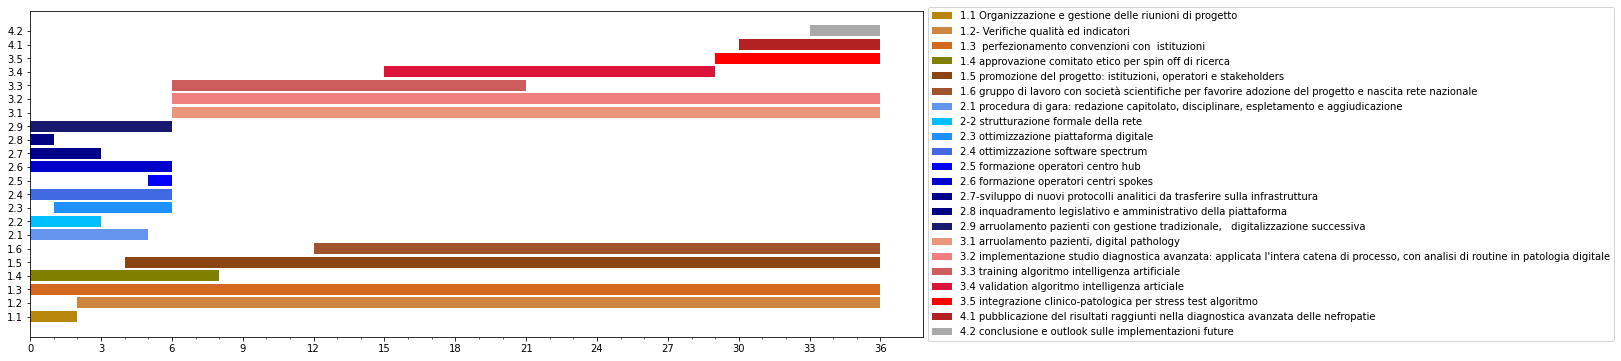

In [5]:
# create a column with the color for each department
def color(row):
    c_dict = dict(zip(jobDesc, colorPalette))
    return c_dict[row['Task']]
df['color'] = df.apply(color, axis=1)

from matplotlib.patches import Patch
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.months_start_to_end, left=df.start_num, color=df.color)

##### LEGENDS #####
legend_dict = dict(zip(df.Attività.to_list(), colorPalette ))
legend_elements = [Patch(facecolor=legend_dict[i], label=i)  for i in legend_dict]

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 3)
#xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")  
xticks_labels = pd.interval_range(proj_start, end=df.Lenght.max())      ## modifica per interi
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
#pd.interval_range

ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
#ax.set_xticklabels(xticks_labels[::3])
print(xticks_labels[::3])

plt.show()

In [6]:
# months between start and current progression of each task
df['current_num'] = (df.months_start_to_end * df.Completion)

from matplotlib.patches import Patch

plt.style.use('seaborn')

##### LEGENDS #####
legend_dict = dict(zip(df.Attività.to_list(), colorPalette ))
legend_elements = [Patch(facecolor=legend_dict[i], label=i)  for i in legend_dict]

#plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

##### TICKS #####
xticks = np.arange(-0, 37, 2)
#xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_labels = pd.interval_range(0, 37)      ## modifica per interi
xticks_minor = np.arange(0, 37, 1)

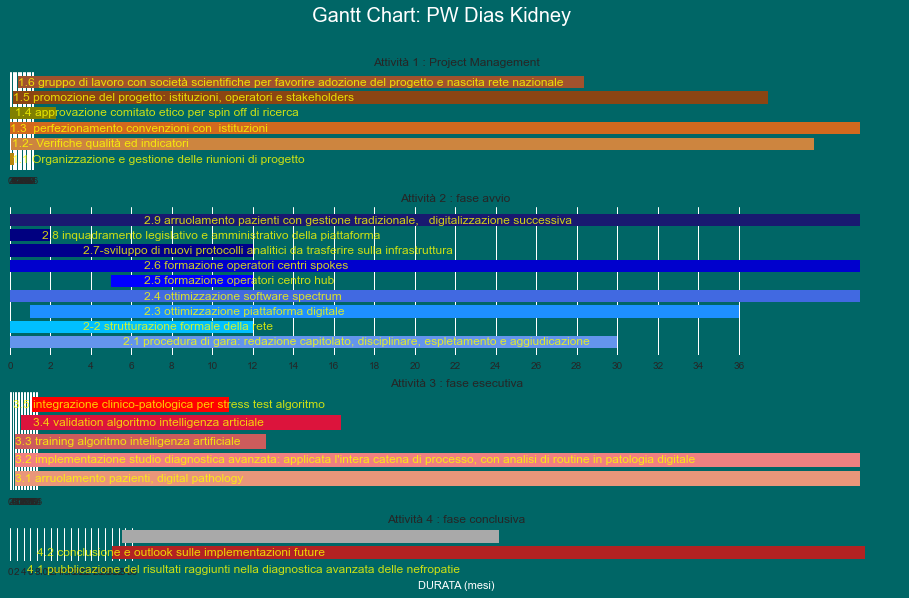

In [7]:
gs_kw = dict(height_ratios=[6, 9, 6, 2], wspace=0, hspace=0.4)
fig, ax = plt.subplots(4, figsize=(16,9), gridspec_kw=gs_kw)
#ax = ax.ravel()

fig.suptitle('Gantt Chart: PW Dias Kidney', color='#ffffff', size=20)

df0 = df[df['Task'] <'2']   
ax[0].barh(df0.Task, df0.current_num, left=df0.start_num, color=df0.color)
ax[0].title.set_text('Attività 1 : Project Management')

for idx, row in df0.iterrows():
    if row.Lenght<15 and row.start_num>25:
        ax[0].text(row.start_num-25, idx, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)
    elif row.Lenght<15 and row.start_num<20:
        ax[0].text(row.end_num+0.6, idx, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)
    else:
        ax[0].text(row.start_num+0.6, idx, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)
        
df1 = df[(df.Task > '2') & (df.Task<'3')]
ax[1].barh(df1.Task, df1.current_num, left=df1.start_num, color=df1.color)
ax[1].title.set_text('Attività 2 : fase avvio ')

for idx, row in df1.iterrows():
    if row.Lenght<15 and row.start_num>25:
        ax[1].text(row.start_num-25, idx-6, f"{row.Attività}", color='#ffff00', va='center',  alpha=0.8, size=12)
    elif row.Lenght<15 and row.start_num<20:
        ax[1].text(row.end_num+0.6, idx-6, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)
    else:
        ax[1].text(row.start_num+0.6, idx-6, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)
            
df2 = df[(df.Task > '3') & (df.Task<'4')]
ax[2].barh(df2.Task, df2.current_num, left=df2.start_num, color=df2.color)
ax[2].title.set_text('Attività 3 : fase esecutiva')

for idx, row in df2.iterrows():
    if row.Lenght<15 and row.start_num>25:
        ax[2].text(row.start_num-25, idx-15, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)
    elif row.Lenght<15 and row.start_num<20:
        ax[2].text(row.end_num+0.6, idx-15, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)
    else:
        ax[2].text(row.start_num+0.6, idx-15, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)
       
df3 = df[(df.Task > '4')]
ax[3].barh(df3.Task, df3.current_num, left=df3.start_num, color=df3.color)
ax[3].title.set_text('Attività 4 : fase conclusiva')

for idx, row in df3.iterrows():
    if row.Lenght<15 and row.start_num>25:
        ax[3].text(row.start_num-25, idx-21, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)
    elif row.Lenght<15 and row.start_num<20:
        ax[3].text(row.end_num+0.6, idx-21, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)
    else:
        ax[3].text(row.start_num+0.6, idx-21, f"{row.Attività}", color='#ffff00', va='center', alpha=0.8, size=12)


for i in range(4):
    ax[i].set_xticks(xticks)
    #ax[i].set_xticks(xticks_minor, minor=True)

    #aggiunta
    ax[i].yaxis.set_visible(False)
    ax[i].set_facecolor('#006666')

    #ax.axis('off')
    ax[i].spines[["top", "right", 'left']].set_visible(False)

ax[3].set_xlabel('DURATA (mesi)',color='#ffffff')


fig.set_facecolor('#006666')
plt.show()
#plt.savefig("Gantt_PW_Dias.png", bbox_inches="tight") 

#plt.close("all")


## SIMPLE GANTT CHART

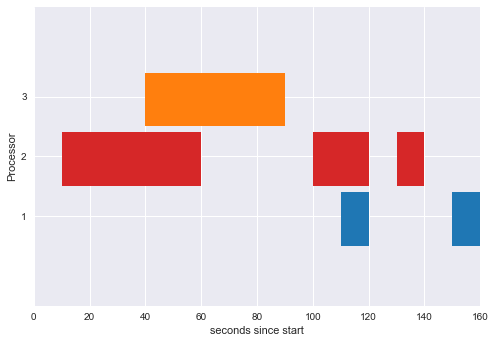

In [8]:
import matplotlib.pyplot as plt
fig, gnt = plt.subplots()
gnt.set_ylim(0, 50)
gnt.set_xlim(0, 160)
gnt.set_xlabel('seconds since start')
gnt.set_ylabel('Processor')
gnt.set_yticks([15, 25, 35])
gnt.set_yticklabels(['1', '2', '3'])
gnt.grid(True)
gnt.broken_barh([(40, 50)], (30, 9), facecolors =('tab:orange'))
gnt.broken_barh([(110, 10), (150, 10)], (10, 9),
                facecolors ='tab:blue')

gnt.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
                facecolors =('tab:red'))

#plt.savefig("gantt1.png") 